In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [75]:
df = pd.read_csv(r'D:\AKG\Dataset\boids\boids_python2\monthly_milk_production.csv',index_col='Time')
df.index.freq='1S'
df = df.iloc[:250]
df.head

<bound method NDFrame.head of               x0
Time            
0     317.192771
1     318.023210
2     316.984612
3     315.519720
4     314.362461
...          ...
245    35.211971
246    34.393451
247    32.842592
248    35.842309
249    37.289137

[250 rows x 1 columns]>

<AxesSubplot:xlabel='Time'>

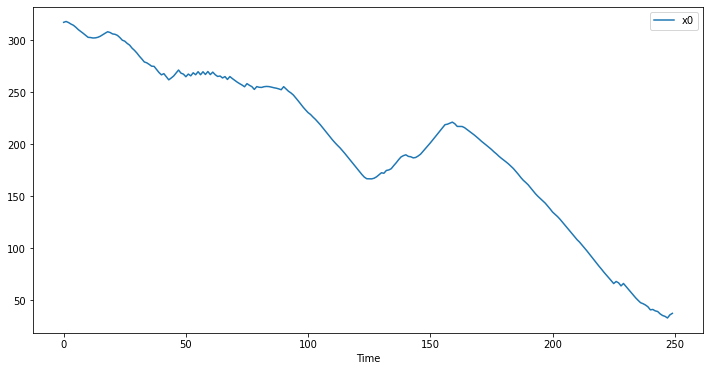

In [76]:
df.plot(figsize=(12,6))

In [77]:
train = df.iloc[:200]
test = df.iloc[200:]
train.shape, test.shape

((200, 1), (50, 1))

In [79]:
X_train = np.array([i for i in range(0, 200)])
y_train = np.array(train)

X_val = np.array([i for i in range(201, 251)])
y_val = np.array(test)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((200,), (200, 1), (50,), (50, 1))

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [40]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [41]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [100]:
model = Sequential()
model.add(Dense(, activation='relu', input_shape=(1,)))  # Input layer
model.add(Dense(8, activation='relu'))  # Hidden layer 1
model.add(Dense(1, activation='relu')) 

model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               256       
                                                                 
 dense_33 (Dense)            (None, 8)                 1032      
                                                                 
 dense_34 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.fit(X_train, y_train, epochs=700, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/700
4/4 [==============================] - 0s 28ms/step - loss: 56294.8281 - val_loss: 6725.9111
Epoch 2/700
4/4 [==============================] - 0s 6ms/step - loss: 56294.8359 - val_loss: 6725.9111
Epoch 3/700
4/4 [==============================] - 0s 6ms/step - loss: 56294.8281 - val_loss: 6725.9111
Epoch 4/700
4/4 [==============================] - 0s 7ms/step - loss: 56294.8281 - val_loss: 6725.9111
Epoch 5/700
4/4 [==============================] - 0s 6ms/step - loss: 56294.8281 - val_loss: 6725.9111
Epoch 6/700
4/4 [==============================] - 0s 6ms/step - loss: 56294.8359 - val_loss: 6725.9111
Epoch 7/700
4/4 [==============================] - 0s 6ms/step - loss: 56294.8281 - val_loss: 6725.9111
Epoch 8/700
4/4 [==============================] - 0s 7ms/step - loss: 56294.8281 - val_loss: 6725.9111
Epoch 9/700
4/4 [==============================] - 0s 6ms/step - loss: 56294.8281 - val_loss: 6725.9111
Epoch 10/700
4/4 [==============================] - 0s 6ms/step

In [49]:
model.fit(generator,epochs=50)

Epoch 1/50


238/238 [==============================] - 1s 816us/step - loss: 0.0184
Epoch 2/50
238/238 [==============================] - 0s 938us/step - loss: 0.0018
Epoch 3/50
238/238 [==============================] - 0s 880us/step - loss: 0.0018
Epoch 4/50
238/238 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 5/50
238/238 [==============================] - 0s 884us/step - loss: 0.0017
Epoch 6/50
238/238 [==============================] - 0s 884us/step - loss: 0.0019
Epoch 7/50
238/238 [==============================] - 0s 930us/step - loss: 0.0019
Epoch 8/50
238/238 [==============================] - 0s 905us/step - loss: 0.0018
Epoch 9/50
238/238 [==============================] - 0s 968us/step - loss: 0.0017
Epoch 10/50
238/238 [==============================] - 0s 931us/step - loss: 0.0019
Epoch 11/50
238/238 [==============================] - 0s 888us/step - loss: 0.0019
Epoch 12/50
238/238 [==============================] - 0s 925us/step - loss: 0.0018
Epoch 13/50
23

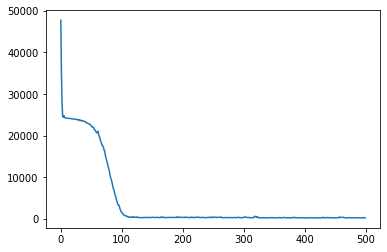

In [92]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [51]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

ValueError: in user code:

    File "c:\Users\adeel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\adeel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\adeel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\adeel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "c:\Users\adeel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\adeel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_5" (type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 12)
    
    Call arguments received by layer "sequential_5" (type Sequential):
      • inputs=tf.Tensor(shape=(None, 12, 1), dtype=float32)
      • training=False
      • mask=None


<AxesSubplot:xlabel='Time'>

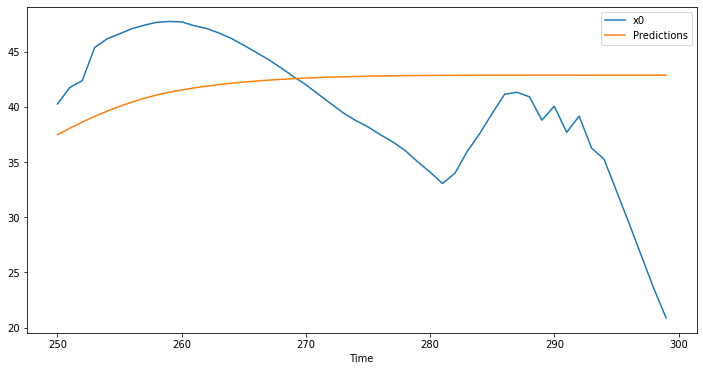

In [52]:
test.plot(figsize=(12,6))

7/7 [==============================] - 0s 832us/step


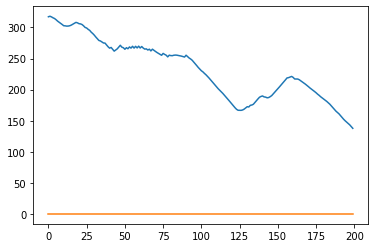

In [97]:
preds = model.predict(X_train)
plt.plot(X_train, y_train)
plt.plot(X_train, preds)